<a href="https://colab.research.google.com/github/boywithdragons/Fake-news-detection-with-Machine-learning/blob/main/Fake_News_Detection_WorkingCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install --upgrade tensorflow

In [4]:
!pip install plotly

In [6]:
!pip install --upgrade nbformat

In [7]:
!pip install nltk

In [8]:
!pip install spacy

In [9]:
!pip install WordCloud

In [10]:
!pip install gensim

In [36]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.9 MB/s eta 0:00:00


In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
import tensorflow as tf

In [13]:
import pandas as pd

In [14]:
import numpy as np

In [15]:
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
from wordcloud import WordCloud, STOPWORDS

In [18]:
import nltk

In [19]:
import re

In [20]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [21]:
from nltk.corpus import stopwords

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [23]:
import gensim

In [24]:
from gensim.utils import simple_preprocess

In [25]:
from gensim.parsing.preprocessing import STOPWORDS

In [26]:
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

In [27]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
from tensorflow.keras.models import Sequential

In [33]:
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional

In [34]:
from tensorflow.keras.models import Model

In [37]:
from jupyterthemes import jtplot

In [38]:
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [59]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [60]:
df_true.head(2)

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 

[2 rows x 4 columns]

In [61]:
df_true['isfake'] = 1
df_true.head()

title  ... isfake
0  As U.S. budget fight looms, Republicans flip t...  ...      1
1  U.S. military to accept transgender recruits o...  ...      1
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...      1
3  FBI Russia probe helped by Australian diplomat...  ...      1
4  Trump wants Postal Service to charge 'much mor...  ...      1

[5 rows x 5 columns]

In [62]:
df_fake['isfake'] = 0
df_fake.head()

title  ... isfake
0   Donald Trump Sends Out Embarrassing New Year’...  ...      0
1   Drunk Bragging Trump Staffer Started Russian ...  ...      0
2   Sheriff David Clarke Becomes An Internet Joke...  ...      0
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...      0
4   Pope Francis Just Called Out Donald Trump Dur...  ...      0

[5 rows x 5 columns]

In [63]:
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df

title  ... isfake
0      As U.S. budget fight looms, Republicans flip t...  ...      1
1      U.S. military to accept transgender recruits o...  ...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...      1
3      FBI Russia probe helped by Australian diplomat...  ...      1
4      Trump wants Postal Service to charge 'much mor...  ...      1
...                                                  ...  ...    ...
44893  McPain: John McCain Furious That Iran Treated ...  ...      0
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...      0
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...      0
44896  How to Blow $700 Million: Al Jazeera America F...  ...      0
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...      0

[44898 rows x 5 columns]

In [64]:
df.drop(columns = ['date'], inplace = True)

In [65]:
df['original'] = df['title'] + ' ' + df['text']
df.head()

title  ...                                           original
0  As U.S. budget fight looms, Republicans flip t...  ...  As U.S. budget fight looms, Republicans flip t...
1  U.S. military to accept transgender recruits o...  ...  U.S. military to accept transgender recruits o...
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  Senior U.S. Republican senator: 'Let Mr. Muell...
3  FBI Russia probe helped by Australian diplomat...  ...  FBI Russia probe helped by Australian diplomat...
4  Trump wants Postal Service to charge 'much mor...  ...  Trump wants Postal Service to charge 'much mor...

[5 rows x 5 columns]

In [66]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [67]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [68]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [69]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)

    return result

In [70]:
df['clean'] = df['original'].apply(preprocess)

In [71]:
df['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [72]:
print(df['clean'][0])

['budget', 'fight', 'looms', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'congress', 'voted', 'month', 'huge', 'expansion', 'national', 'debt', 'cuts', 'called', 'fiscal', 'conservative', 'sunday', 'urged', 'budget', 'restraint', 'keeping', 'sharp', 'pivot', 'republicans', 'representative', 'mark', 'meadows', 'speaking', 'face', 'nation', 'drew', 'hard', 'line', 'federal', 'spending', 'lawmakers', 'bracing', 'battle', 'january', 'return', 'holidays', 'wednesday', 'lawmakers', 'begin', 'trying', 'pass', 'federal', 'budget', 'fight', 'likely', 'linked', 'issues', 'immigration', 'policy', 'november', 'congressional', 'election', 'campaigns', 'approach', 'republicans', 'seek', 'control', 'congress', 'president', 'donald', 'trump', 'republicans', 'want', 'budget', 'increase', 'military', 'spending', 'democrats', 'want', 'proportional', 'increases', 'defense', 'discretionary', 'spending', 'programs', 'support', 'educati

In [73]:
df

title  ...                                              clean
0      As U.S. budget fight looms, Republicans flip t...  ...  [budget, fight, looms, republicans, flip, fisc...
1      U.S. military to accept transgender recruits o...  ...  [military, accept, transgender, recruits, mond...
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...  [senior, republican, senator, mueller, washing...
3      FBI Russia probe helped by Australian diplomat...  ...  [russia, probe, helped, australian, diplomat, ...
4      Trump wants Postal Service to charge 'much mor...  ...  [trump, wants, postal, service, charge, amazon...
...                                                  ...  ...                                                ...
44893  McPain: John McCain Furious That Iran Treated ...  ...  [mcpain, john, mccain, furious, iran, treated,...
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...  [justice, yahoo, settles, mail, privacy, class...
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...  [sunnistan, allied, safe, zone, plan, territor...
44896  How to Blow $700 Million: Al Jazeera America F...  ...  [blow, million, jazeera, america, finally, cal...
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...  [navy, sailors, held, iranian, military, signs...

[44898 rows x 6 columns]

In [77]:
list_of_words = []
for i in df.clean:
    for j in i:
        list_of_words.append(j)

In [82]:
list_of_words

['budget',
 'fight',
 'looms',
 'republicans',
 'flip',
 'fiscal',
 'script',
 'washington',
 'reuters',
 'head',
 'conservative',
 'republican',
 'faction',
 'congress',
 'voted',
 'month',
 'huge',
 'expansion',
 'national',
 'debt',
 'cuts',
 'called',
 'fiscal',
 'conservative',
 'sunday',
 'urged',
 'budget',
 'restraint',
 'keeping',
 'sharp',
 'pivot',
 'republicans',
 'representative',
 'mark',
 'meadows',
 'speaking',
 'face',
 'nation',
 'drew',
 'hard',
 'line',
 'federal',
 'spending',
 'lawmakers',
 'bracing',
 'battle',
 'january',
 'return',
 'holidays',
 'wednesday',
 'lawmakers',
 'begin',
 'trying',
 'pass',
 'federal',
 'budget',
 'fight',
 'likely',
 'linked',
 'issues',
 'immigration',
 'policy',
 'november',
 'congressional',
 'election',
 'campaigns',
 'approach',
 'republicans',
 'seek',
 'control',
 'congress',
 'president',
 'donald',
 'trump',
 'republicans',
 'want',
 'budget',
 'increase',
 'military',
 'spending',
 'democrats',
 'want',
 'proportional',
 '

In [79]:
len(list_of_words)

9276947

In [80]:
total_words = len(list(set(list_of_words)))
total_words

108704

In [83]:
df['clean_joined'] = df['clean'].apply(lambda x: " ".join(x))

In [84]:
df

title  ...                                       clean_joined
0      As U.S. budget fight looms, Republicans flip t...  ...  budget fight looms republicans flip fiscal scr...
1      U.S. military to accept transgender recruits o...  ...  military accept transgender recruits monday pe...
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...  senior republican senator mueller washington r...
3      FBI Russia probe helped by Australian diplomat...  ...  russia probe helped australian diplomat washin...
4      Trump wants Postal Service to charge 'much mor...  ...  trump wants postal service charge amazon shipm...
...                                                  ...  ...                                                ...
44893  McPain: John McCain Furious That Iran Treated ...  ...  mcpain john mccain furious iran treated sailor...
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...  justice yahoo settles mail privacy class actio...
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...  sunnistan allied safe zone plan territorial bo...
44896  How to Blow $700 Million: Al Jazeera America F...  ...  blow million jazeera america finally calls qui...
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...  navy sailors held iranian military signs neoco...

[44898 rows x 7 columns]

In [85]:
df['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

In [86]:
df

title  ...                                       clean_joined
0      As U.S. budget fight looms, Republicans flip t...  ...  budget fight looms republicans flip fiscal scr...
1      U.S. military to accept transgender recruits o...  ...  military accept transgender recruits monday pe...
2      Senior U.S. Republican senator: 'Let Mr. Muell...  ...  senior republican senator mueller washington r...
3      FBI Russia probe helped by Australian diplomat...  ...  russia probe helped australian diplomat washin...
4      Trump wants Postal Service to charge 'much mor...  ...  trump wants postal service charge amazon shipm...
...                                                  ...  ...                                                ...
44893  McPain: John McCain Furious That Iran Treated ...  ...  mcpain john mccain furious iran treated sailor...
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...  ...  justice yahoo settles mail privacy class actio...
44895  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...  ...  sunnistan allied safe zone plan territorial bo...
44896  How to Blow $700 Million: Al Jazeera America F...  ...  blow million jazeera america finally calls qui...
44897  10 U.S. Navy Sailors Held by Iranian Military ...  ...  navy sailors held iranian military signs neoco...

[44898 rows x 7 columns]

<Axes: xlabel='count', ylabel='subject'>

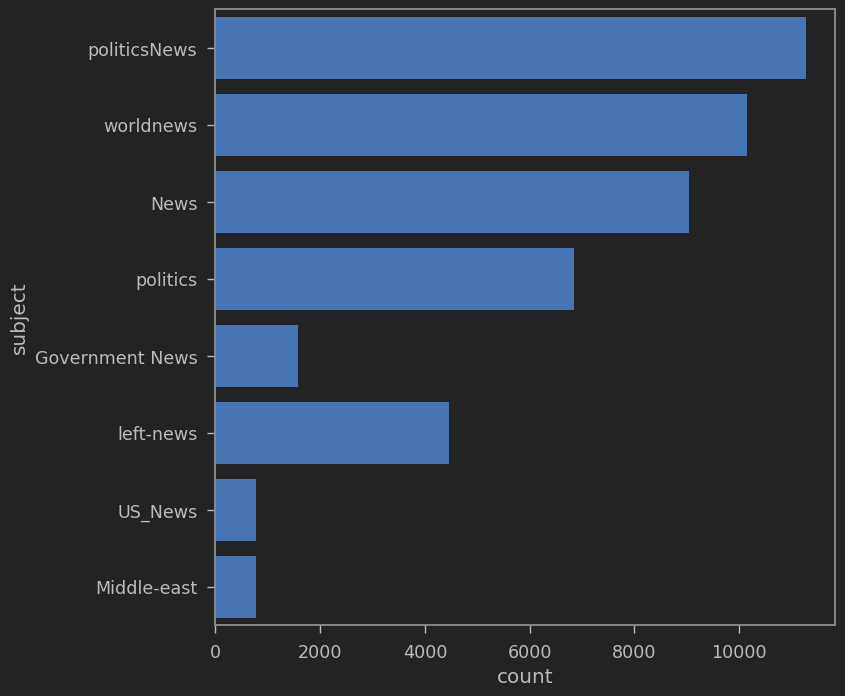

In [87]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "subject", data = df)

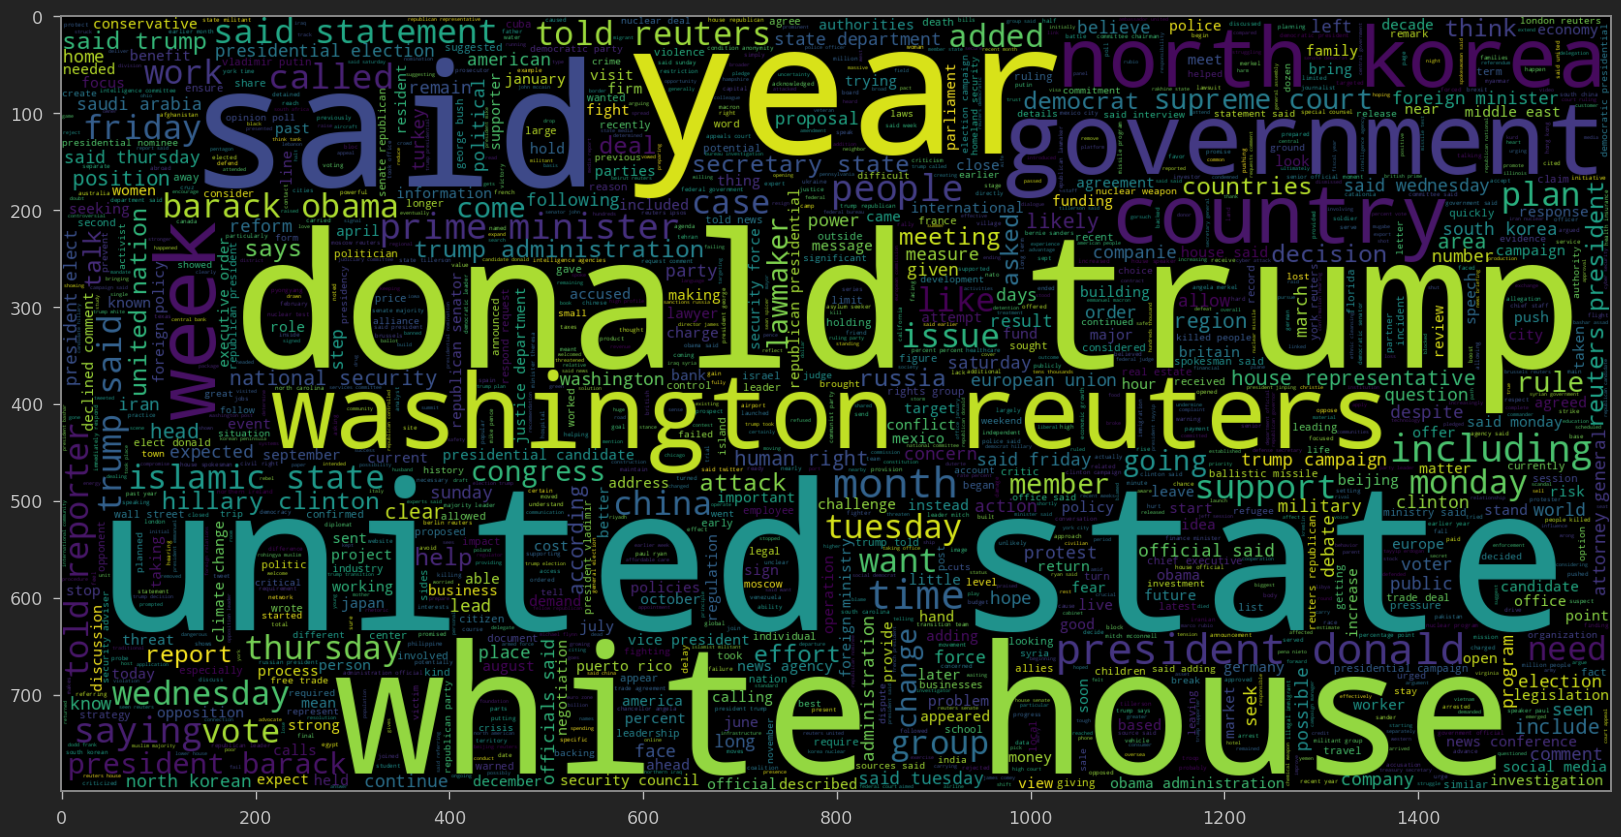

In [88]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

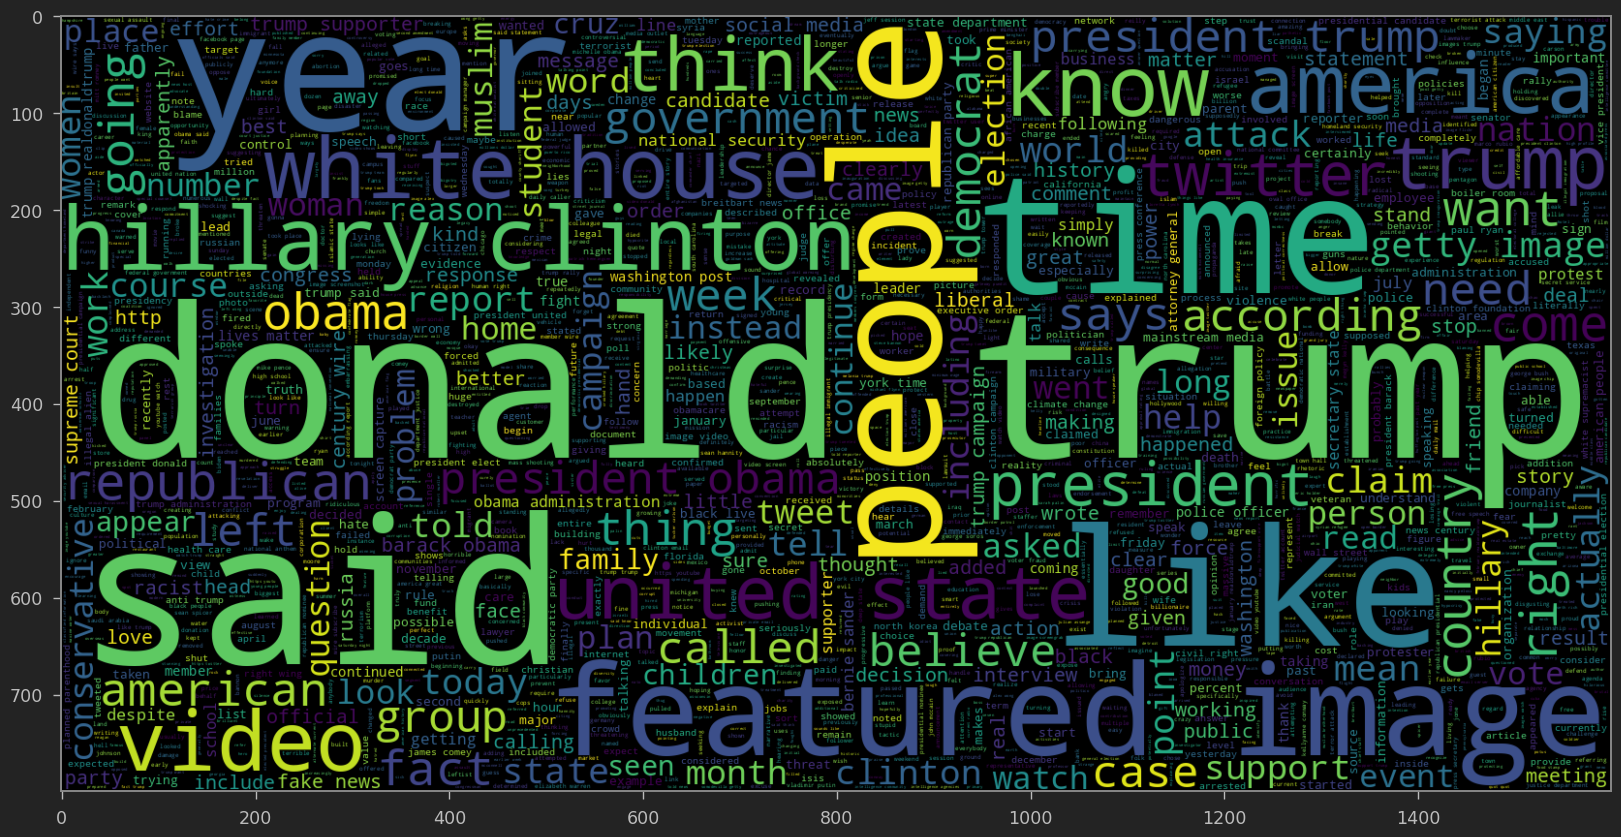

In [89]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.isfake == 0].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [93]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [94]:
maxlen = -1
for doc in df.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [95]:
import plotly.express as px
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined], nbins = 100)
fig.show()

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.clean_joined, df.isfake, test_size = 0.2)

In [97]:
from nltk import word_tokenize

In [98]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [99]:
print("The encoding for document\n",df.clean_joined[0],"\n is : ",train_sequences[0])

The encoding for document
 budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats say

In [100]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post')

In [101]:
for i,doc in enumerate(padded_train[:2]):
     print("The padded encoding for document",i+1," is : ",doc)

The padded encoding for document 1  is :  [ 3424    24   208  1187    97  1118   540 17518  1295   463    71   818
  1954    31  3297   431    24  3505   307   109    19    30  2156    23
  6471  4510  3424   431   350  1257    61   158  3771   208  1187    88
     5    24     7    97]
The padded encoding for document 2  is :  [  107     1 16035    18   629  1057   684   860   572   980   451    21
  1658   857   241  1778  1057     1   141  2235   314   241     1   295
     1   905   396 21857   860  1875  3185    89    21    58     1   206
 23319    37   536  1122]


In [102]:
# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [103]:
total_words

108704

In [104]:
y_train = np.asarray(y_train)

In [105]:
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 2)

Epoch 1/2
506/506 ━━━━━━━━━━━━━━━━━━━━ 212s 407ms/step - acc: 0.9645 - loss: 0.1039 - val_acc: 0.9978 - val_loss: 0.0121
Epoch 2/2
506/506 ━━━━━━━━━━━━━━━━━━━━ 206s 406ms/step - acc: 0.9996 - loss: 0.0016 - val_acc: 0.9981 - val_loss: 0.0130


In [106]:
pred = model.predict(padded_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step


In [107]:
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [108]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9986636971046771


<Axes: >

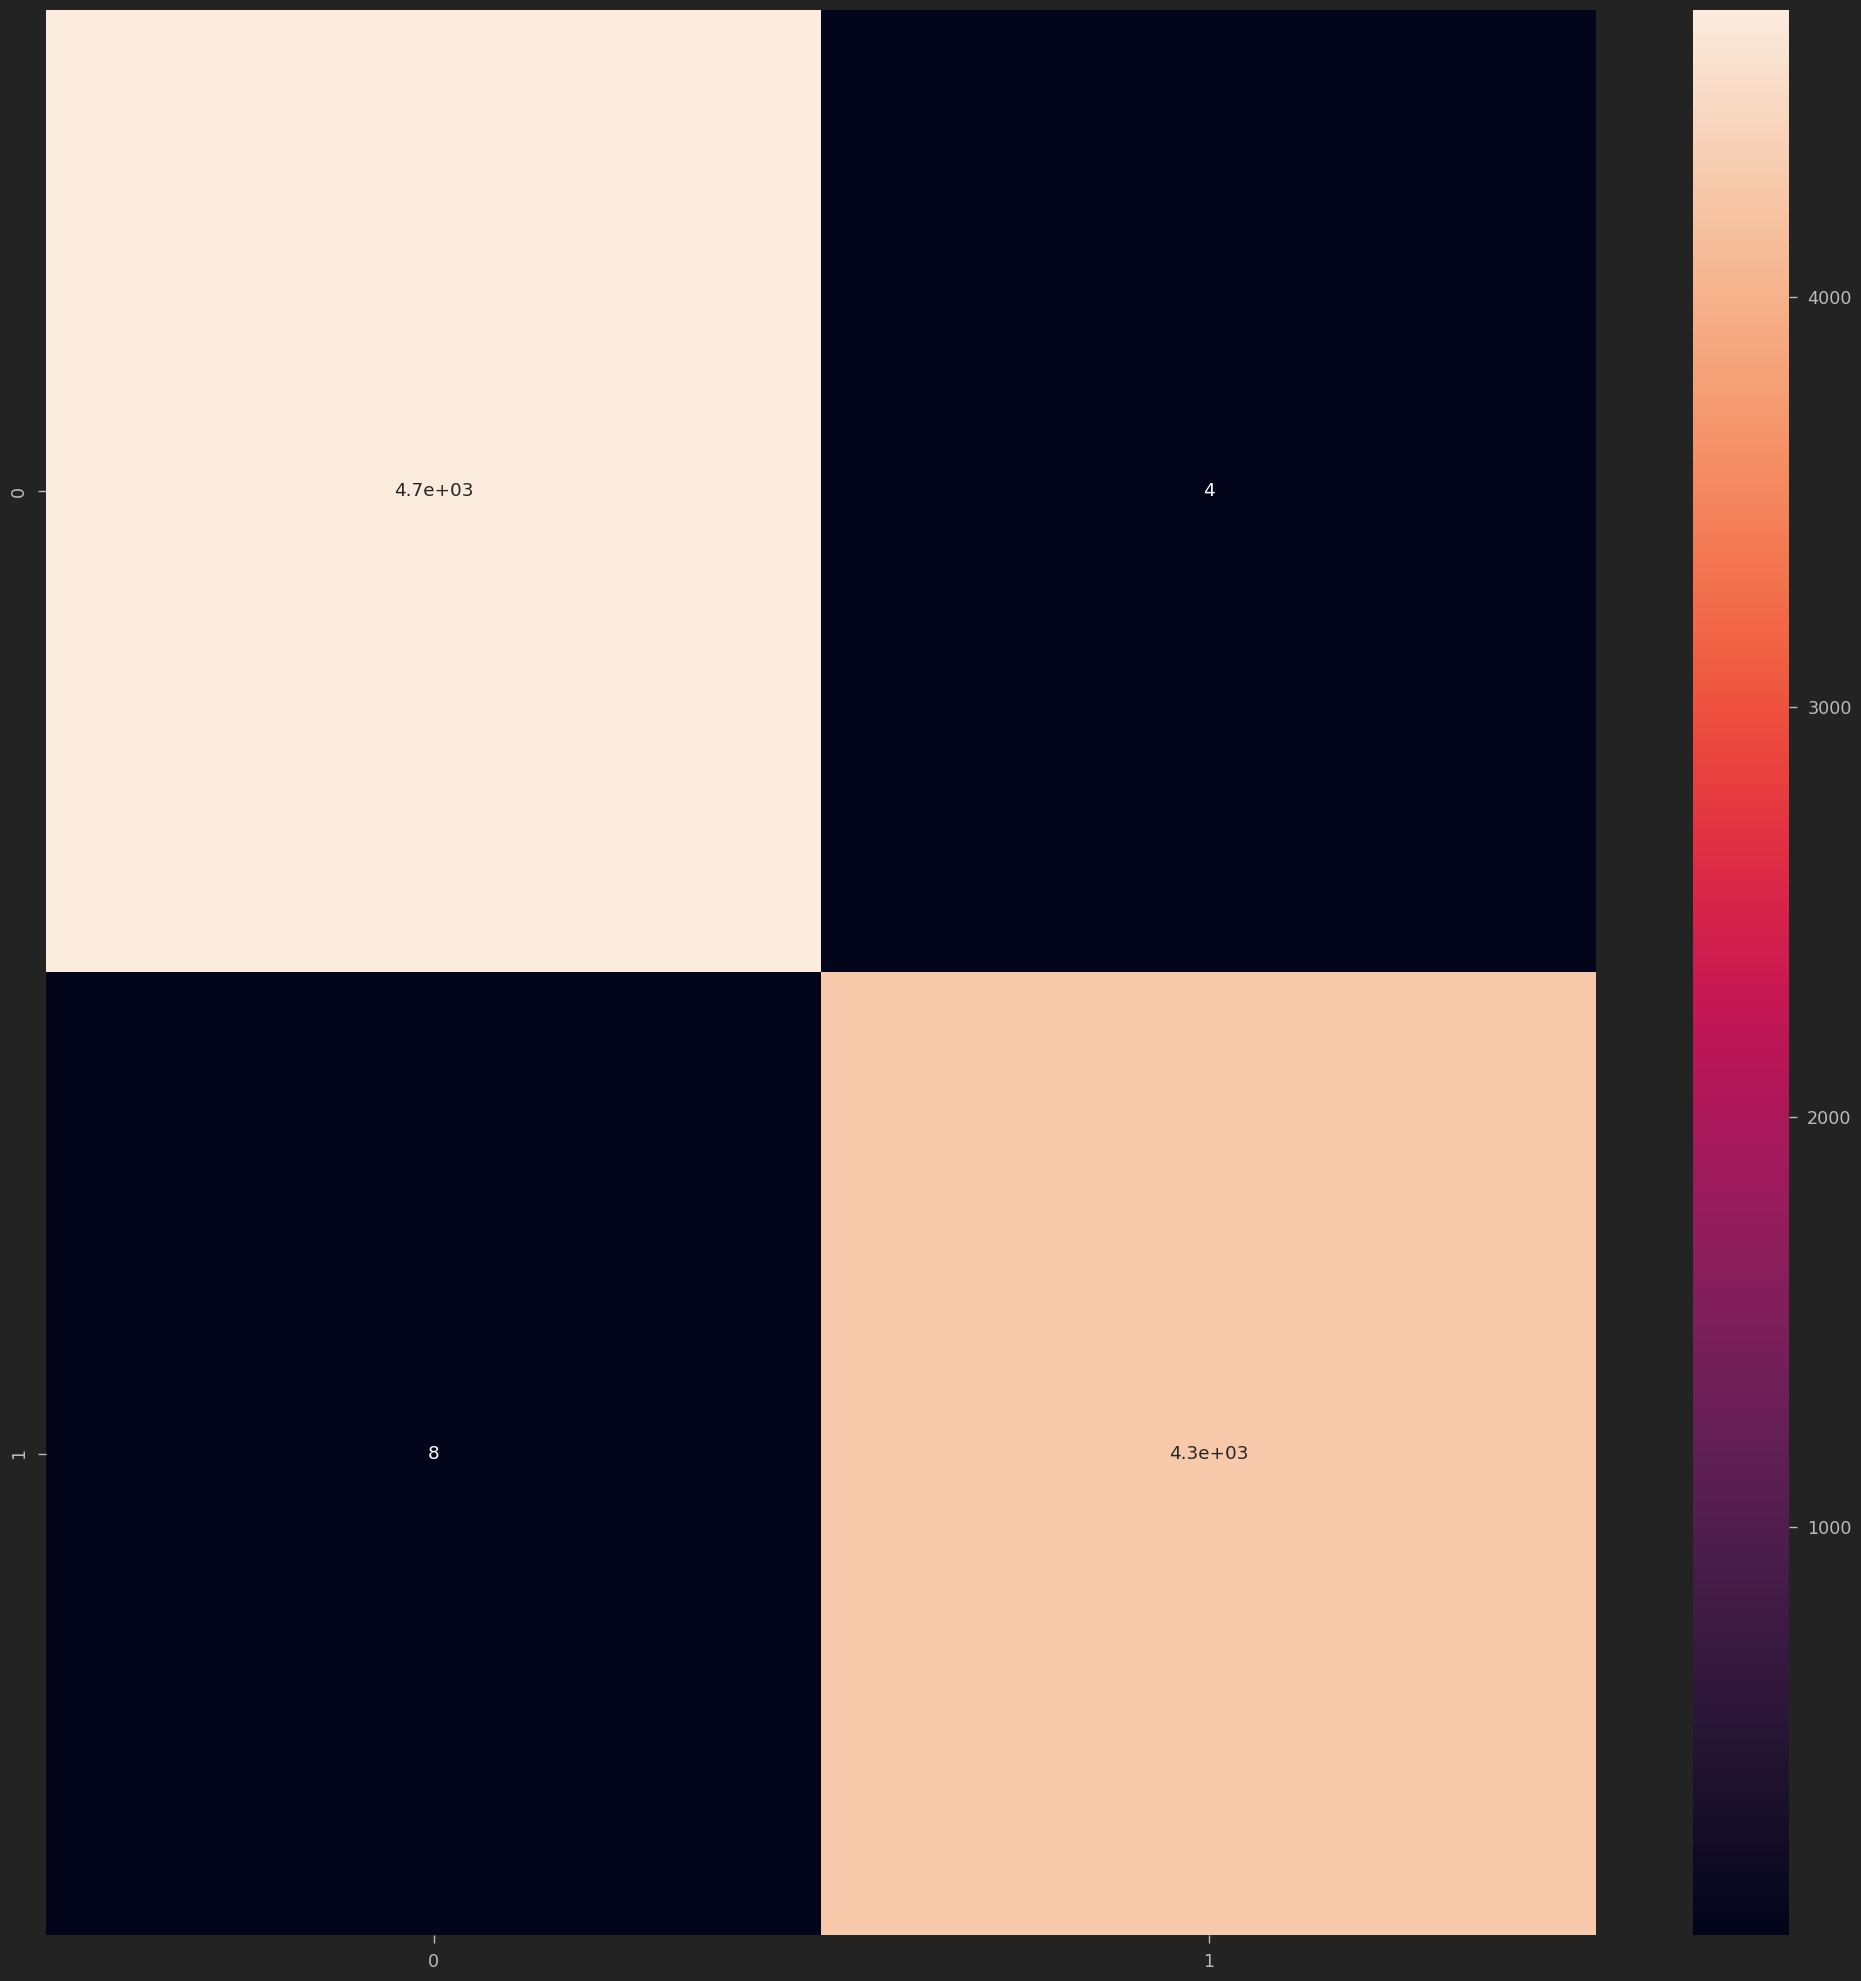

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [110]:
category = { 0: 'Fake News', 1 : "Real News"}

In [111]:
# data containing real news
df_true
# data containing fake news
df_fake
# dataframe information
df_true.info()
# dataframe information
df_fake.info()
# check for null values
df_true.isnull().sum()
# check for null values
df_fake.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
 4   isfake   21417 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 836.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
 4   isfake   23481 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 917.4+ KB


title      0
text       0
subject    0
date       0
isfake     0
dtype: int64

In [112]:
df['original'][5]
df['clean_joined'][5]

'white house congress prepare talks spending immigration west palm beach washington reuters white house said friday kick talks week republican democratic congressional leaders immigration policy government spending issues need wrapped early year expected flurry legislative activity comes republicans democrats begin stage midterm congressional elections november president donald trump republican party eager maintain control congress democrats look openings wrest seats away senate house representatives wednesday trump budget chief mick mulvaney legislative affairs director marc short meet senate majority leader mitch mcconnell house speaker paul ryan republicans democratic counterparts senator chuck schumer representative nancy pelosi white house said followed weekend strategy sessions trump mcconnell ryan camp david presidential retreat maryland according white house senate returns work house congress passed short term government funding week taking christmas break needs come agreement 

<Axes: xlabel='count', ylabel='isfake'>

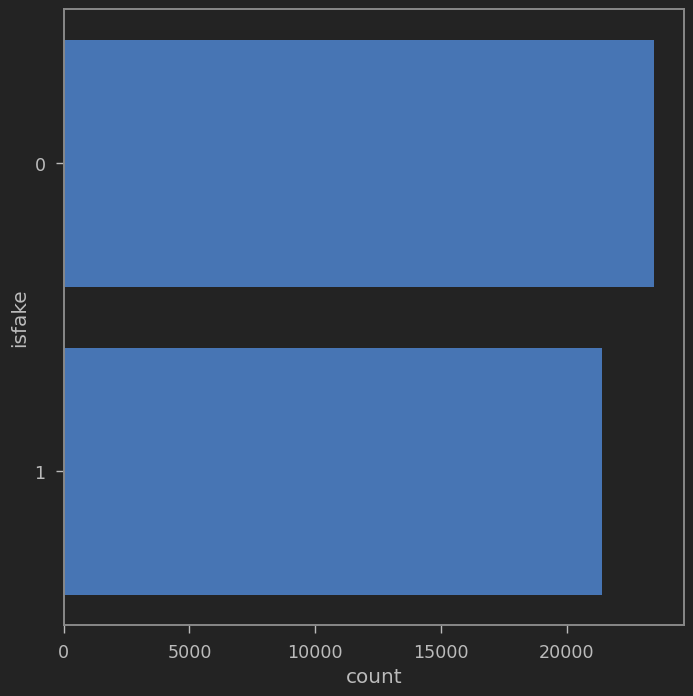

In [113]:
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = df)